# **CIFAR-10 Dataset Deep Learning Project**
CIFAR-10 is a widely used dataset in the field of computer vision. 
It contains a total of 60,000 color images categorized into 10 different classes. 
This project focuses on training and testing a deep learning model on the CIFAR-10 dataset. 
The objective is to develop a classification model and evaluate its performance.

## Dataset Analysis
The CIFAR-10 dataset has the following characteristics:
- **Dimensions**: Each image is 32x32 pixels with 3 channels (RGB).
- **Classes**: A total of 10 classes (e.g., airplane, car, bird, cat, deer, dog, frog, horse, ship, truck).
- **Distribution**: 50,000 images for training, 10,000 images for testing.

### Data Preparation Process
1. **Data Normalization**: Image pixel values are scaled to the [0,1] range to improve model efficiency.
2. **One-Hot Encoding of Labels**: Labels are converted into vectors to facilitate model understanding.
3. **Training and Validation Sets**: The training set is split into 80% training and 20% validation.

## Loading Required Libraries

In [15]:
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Loading and Preparing the Dataset

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [18]:
# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
# Converting labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Model Definition
This project uses a Convolutional Neural Network (CNN) model with the following structure:
1. **Convolutional Layers**: Extract features from images.
2. **MaxPooling Layers**: Summarize feature maps.
3. **Dropout Layers**: Reduce the risk of overfitting.
4. **Dense Layers**: Fully connected layers for classification.
5. **Activation Functions**: ReLU (for hidden layers) and Softmax (for the output layer).

The model is compiled with the `adam` optimizer and `categorical_crossentropy` loss function.


In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training
The model was trained for a total of 20 epochs using the training dataset. During training, accuracy and loss values for both training and validation sets were recorded.

In [32]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.2722 - loss: 1.9461 - val_accuracy: 0.4894 - val_loss: 1.4442
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4584 - loss: 1.4914 - val_accuracy: 0.5543 - val_loss: 1.2540
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.5189 - loss: 1.3456 - val_accuracy: 0.5929 - val_loss: 1.1545
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5593 - loss: 1.2476 - val_accuracy: 0.5925 - val_loss: 1.1496
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.5788 - loss: 1.1916 - val_accuracy: 0.6475 - val_loss: 1.0398
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5926 - loss: 1.1441 - val_accuracy: 0.6490 - val_loss: 1.0147
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.6110 - loss: 1.0955 - val_accuracy: 0.6695 - val_loss: 0.9624
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6264 - loss: 1.0695 - 

## Performance Evaluation

### Training Results

- **Training Accuracy**: The model’s accuracy on the training set steadily improved.
- **Validation Accuracy**: Validation accuracy generally increased but showed occasional fluctuations.

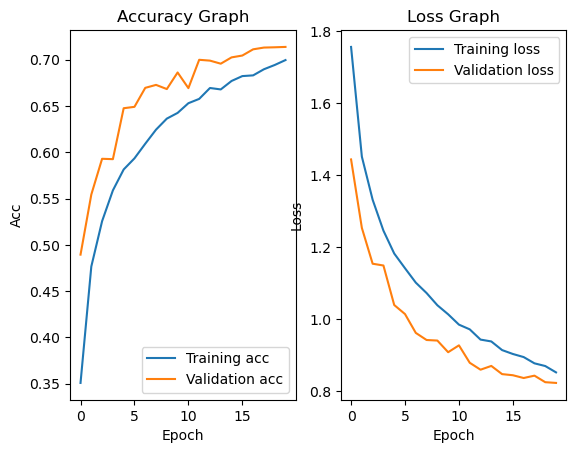

In [98]:
# Training and validation accuracies and loss values
plt.figure(figsize=(12, 4))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.title('Accuracy Graph')

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Graph')

plt.show()

## Performance on the Test Set
- **Test Accuracy**: The model achieved approximately **71.23% accuracy** on the test set.
- **Test Loss**:  The model achieved an average **0.8401 loss** on the test set.

In [67]:
#Accuracy and loss values on the test dataset
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss:: {loss:.4f}")

Test Accuracy: 71.23%
Test Loss:: 0.8401


### Confusion Matrix
The confusion matrix visualizes which classes were correctly or incorrectly classified.

In [69]:
# Creating a confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


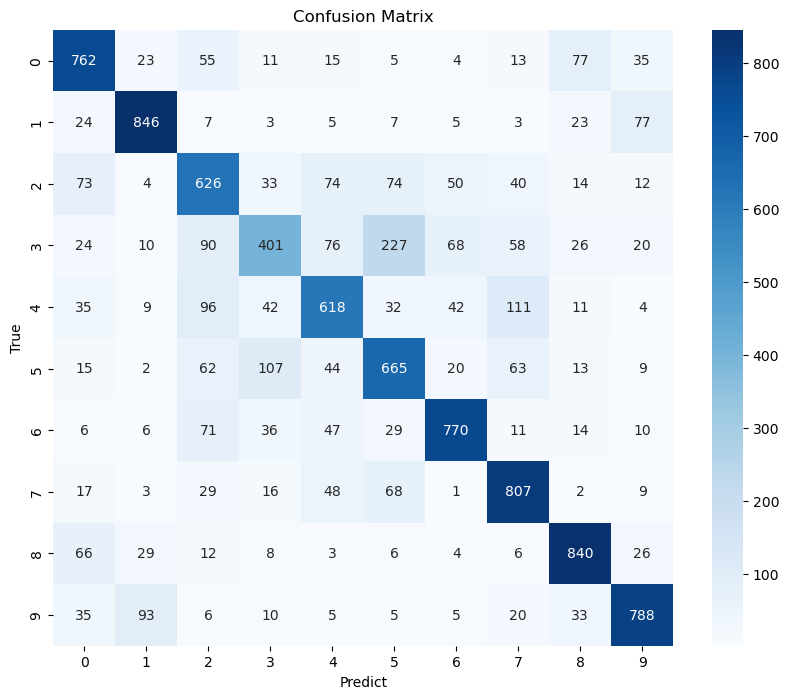

In [143]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Data Augmentation

To improve model generalization and performance, data augmentation techniques are applied. This generates new variations of the input images to simulate a larger and more diverse dataset.


In [115]:
# Define the ImageDataGenerator for data augmentation
data_generator = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
)

In [87]:
data_generator.fit(x_train)

## Model Training
The model is trained again for 20 epochs using data augmentation.

In [127]:
history_augmented = model.fit(
    data_generator.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // 64
)

C:\Users\aydnh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 172ms/step - accuracy: 0.6422 - loss: 1.0212 - val_accuracy: 0.7218 - val_loss: 0.8091
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.6448 - loss: 1.0257 - val_accuracy: 0.7091 - val_loss: 0.8393
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.6472 - loss: 1.0097 - val_accuracy: 0.7331 - val_loss: 0.7672
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.6505 - loss: 1.0123 - val_accuracy: 0.7271 - val_loss: 0.7937
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.6502 - loss: 1.0072 - val_accuracy: 0.7256 - val_loss: 0.7883
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.6463 - loss: 1.0098 - val_accuracy: 0.7144 - val_loss: 0.8278
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.6578 - loss: 0.9954 - val_accuracy: 0.7292 - val_loss: 0.7764
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.6522 - loss: 1.

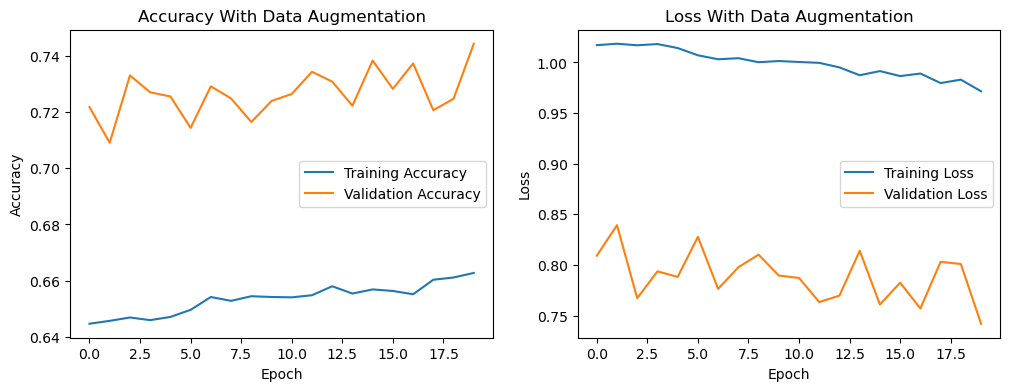

In [141]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy With Data Augmentation')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss With Data Augmentation')

plt.show()


### Performance Evaluation
- **Metrics**:
  - **Test Accuracy**: `74.35%`
  - **Test Loss**: `0.7520`
- **Confusion Matrix**: Reduced misclassifications, especially for similar classes.

In [129]:
# Evaluate on the test set
loss_aug, accuracy_aug = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (With Augmentation): {accuracy_aug * 100:.2f}%")
print(f"Test Loss (With Augmentation): {loss_aug:.4f}")

Test Accuracy (With Augmentation): 74.35%
Test Loss (With Augmentation): 0.7520


## Confusion Matrix
The confusion matrix after applying data augmentation shows improved classification across most categories, with fewer misclassifications compared to the non-augmented model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


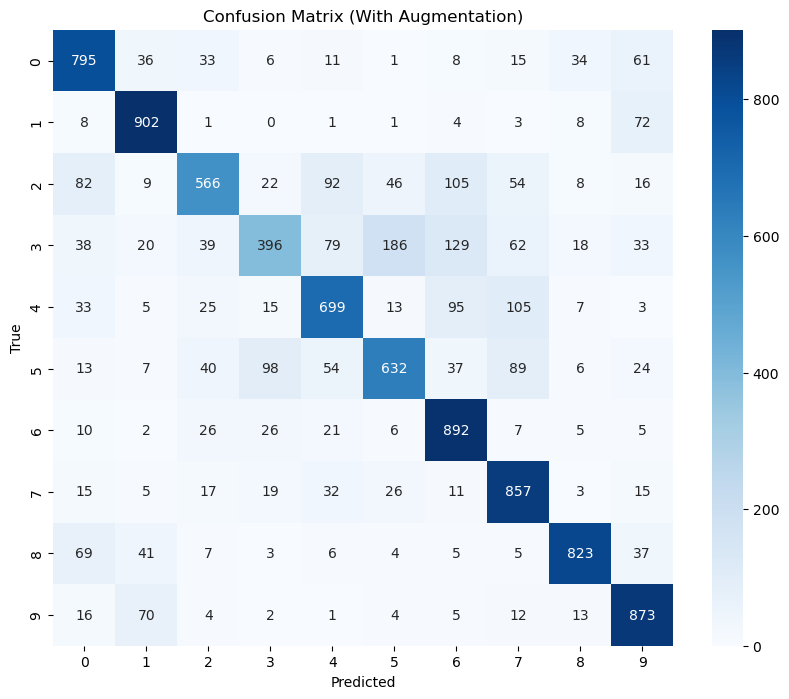

In [134]:
# Generate the confusion matrix
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

cm_aug = confusion_matrix(y_true, y_pred_classes_aug)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_aug, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (With Augmentation)')
plt.show()

## Comparison and Insights

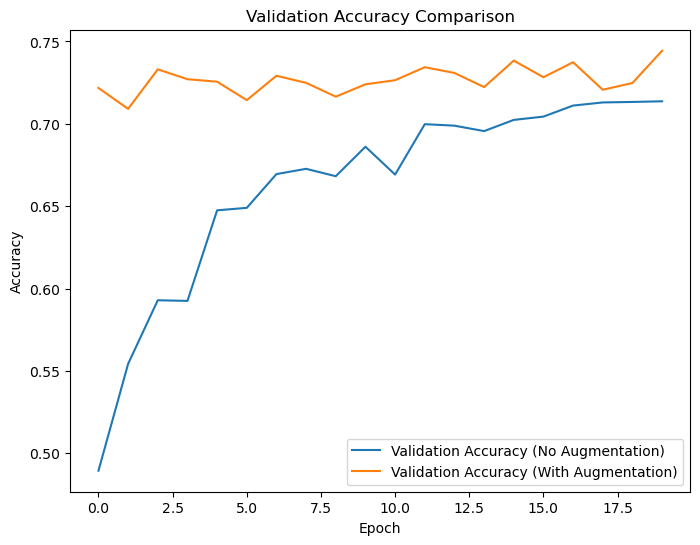

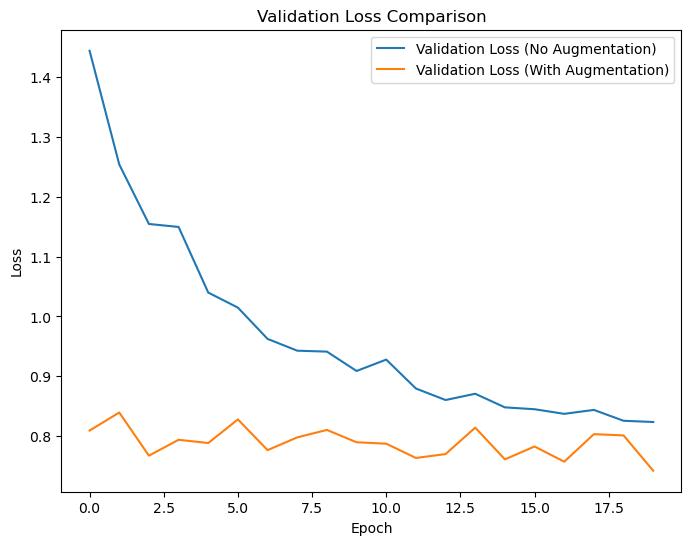

In [138]:
### Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (No Augmentation)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (With Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()

### Loss Comparison
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_loss'], label='Validation Loss (No Augmentation)')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss (With Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()
plt.show()

## Key Observations

1. **Improved Generalization**:
   - The test accuracy increased from `71.23%` to `74.35%`, demonstrating that data augmentation helped the model generalize better to unseen data.
   - Test loss decreased from `0.8401` to `0.7520`, further supporting improved performance.

2. **Validation Trends**:
   - With augmentation, the validation accuracy curve shows more stability over epochs compared to training without augmentation.
   - The gap between training and validation accuracy is narrower, suggesting reduced overfitting.

3. **Class-Specific Improvements**:
   - The confusion matrix highlights reduced errors for visually similar classes (e.g., cats vs. dogs), indicating the augmented data provided better feature representation.
